# **Download Dataset From Kaggle**


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir -p ~/.kaggle/


In [ ]:
! cp /content/drive/MyDrive/Kaggle_API/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download unclesamulus/blood-cells-image-dataset


Dataset URL: https://www.kaggle.com/datasets/unclesamulus/blood-cells-image-dataset
License(s): CC-BY-SA-4.0
100% 268M/268M [00:15<00:00, 23.1MB/s]
100% 268M/268M [00:15<00:00, 17.7MB/s]


In [ ]:
import os
import zipfile

zip_file = "/content/blood-cells-image-dataset.zip"
extract_folder = "/content/blood-cells-image-dataset"
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)
os.listdir(extract_folder)


['bloodcells_dataset']

In [ ]:
for root, dirs, files in os.walk(extract_folder):
    print(f"Directory: {root}")
    for file in files[:5]:
        print(f"  - {file}")

Directory: /content/blood-cells-image-dataset
Directory: /content/blood-cells-image-dataset/bloodcells_dataset
Directory: /content/blood-cells-image-dataset/bloodcells_dataset/ig
  - MMY_23164.jpg
  - MY_139492.jpg
  - MMY_603433.jpg
  - PMY_220816.jpg
  - MY_567025.jpg
Directory: /content/blood-cells-image-dataset/bloodcells_dataset/platelet
  - PLATELET_354841.jpg
  - PLATELET_548204.jpg
  - PLATELET_310300.jpg
  - PLATELET_663926.jpg
  - PLATELET_137525.jpg
Directory: /content/blood-cells-image-dataset/bloodcells_dataset/monocyte
  - MO_823715.jpg
  - MO_356161.jpg
  - MO_56409.jpg
  - MO_332923.jpg
  - MO_78471.jpg
Directory: /content/blood-cells-image-dataset/bloodcells_dataset/lymphocyte
  - LY_13552.jpg
  - LY_588274.jpg
  - LY_346776.jpg
  - LY_418919.jpg
  - LY_735620.jpg
Directory: /content/blood-cells-image-dataset/bloodcells_dataset/basophil
  - BA_298364.jpg
  - BA_330726.jpg
  - BA_268064.jpg
  - BA_372647.jpg
  - BA_716177.jpg
Directory: /content/blood-cells-image-datase

# **Data Exploration**

📸 17092 immagini caricate da 8 classi.


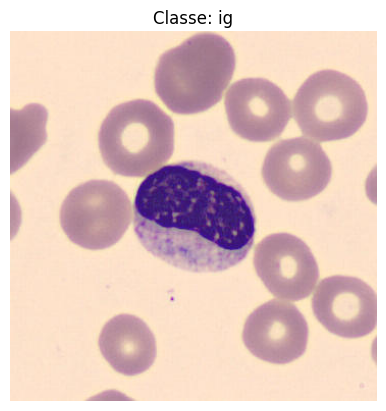

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

dataset_path = "/content/blood-cells-image-dataset/bloodcells_dataset"

image_paths = []
labels = []

for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)

    if os.path.isdir(category_path):
        for img_name in os.listdir(category_path):
            if img_name.endswith(('.png', '.jpg', '.jpeg')):
                image_paths.append(os.path.join(category_path, img_name))
                labels.append(category)

print(f"📸 {len(image_paths)} immagini caricate da {len(set(labels))} classi.")

image = Image.open(image_paths[0])
plt.imshow(image)
plt.title(f"Classe: {labels[0]}")
plt.axis("off")
plt.show()

In [ ]:
import pandas as pd
class_counts = {}

for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)

    if os.path.isdir(category_path):
        num_images = len([img for img in os.listdir(category_path) if img.endswith(('.png', '.jpg', '.jpeg'))])
        class_counts[category] = num_images


df = pd.DataFrame(list(class_counts.items()), columns=["Class", "Number of Images"])


print(df)



          Class  Number of Images
0            ig              2895
1      platelet              2348
2      monocyte              1420
3    lymphocyte              1214
4      basophil              1218
5  erythroblast              1551
6    neutrophil              3329
7    eosinophil              3117


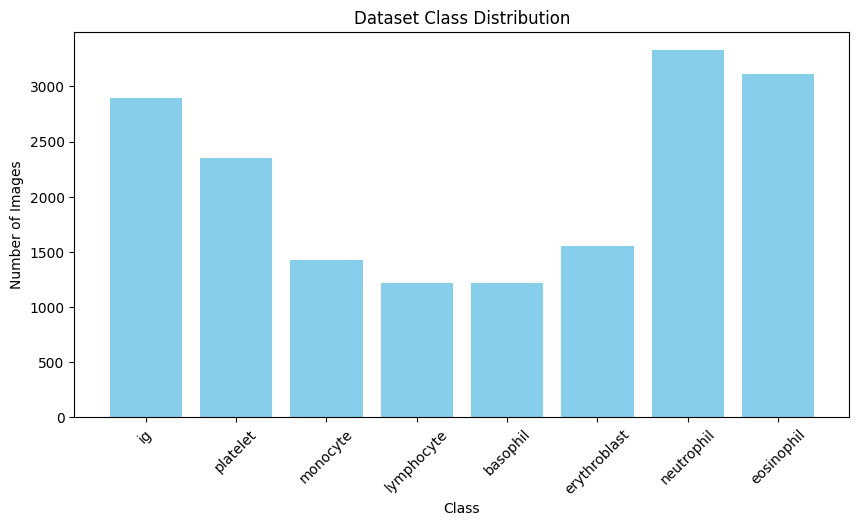

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(df["Class"], df["Number of Images"], color='skyblue')
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Dataset Class Distribution")
plt.xticks(rotation=45)
plt.show()

In [ ]:

import random
import numpy as np
import pandas as pd
import cv2

X = []
y = []

dataset_path = "/content/blood-cells-image-dataset/bloodcells_dataset"

image_size = (64, 64)  # Ridimensioniamo per velocizzare il modello



for cls in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, cls)
    label = cls

    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, image_size)

        X.append(img)
        y.append(label)


X = np.array(X, dtype=np.float32) / 255.0
y = np.array(y)

print(f"📊 Dataset : {X.shape[0]} images, size {X.shape[1]}")

📊 Dataset : 17092 images, size 64


In [ ]:
y.shape

(17092,)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded, num_classes=len(np.unique(y_encoded))) #one-hot encoding
print(f" Class coded: {label_encoder.classes_}")

 Class coded: ['basophil' 'eosinophil' 'erythroblast' 'ig' 'lymphocyte' 'monocyte'
 'neutrophil' 'platelet']


In [ ]:
y_encoded

array([3, 3, 3, ..., 1, 1, 1])

In [ ]:
y_categorical[0]

array([0., 0., 0., 1., 0., 0., 0., 0.])

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y_categorical, test_size=0.3, random_state=42, stratify=y_categorical, shuffle=True
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.3, random_state=42, stratify=y_temp, shuffle=True
)
print(f"Train set: {X_train.shape[0]} images")
print(f"Validation set: {X_val.shape[0]} images")
print(f"Test set: {X_test.shape[0]} images")

Train set: 8374 images
Validation set: 3590 images
Test set: 5128 images


In [ ]:
y_train.shape

(8374, 8)

In [ ]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0.])

In [ ]:
X_train[0]

array([[[0.6313726 , 0.6392157 , 0.8       ],
        [0.64705884, 0.6666667 , 0.81960785],
        [0.6784314 , 0.7137255 , 0.8627451 ],
        ...,
        [0.6627451 , 0.67058825, 0.83137256],
        [0.6784314 , 0.70980394, 0.87058824],
        [0.70980394, 0.7764706 , 0.9137255 ]],

       [[0.65882355, 0.6666667 , 0.827451  ],
        [0.67058825, 0.6745098 , 0.84705883],
        [0.69411767, 0.7294118 , 0.8745098 ],
        ...,
        [0.65882355, 0.6666667 , 0.8235294 ],
        [0.6745098 , 0.68235296, 0.8392157 ],
        [0.68235296, 0.68235296, 0.8392157 ]],

       [[0.6431373 , 0.6509804 , 0.8117647 ],
        [0.6745098 , 0.70980394, 0.85490197],
        [0.7176471 , 0.78039217, 0.9019608 ],
        ...,
        [0.6862745 , 0.69803923, 0.85490197],
        [0.6784314 , 0.6862745 , 0.84313726],
        [0.6745098 , 0.6745098 , 0.83137256]],

       ...,

       [[0.6862745 , 0.70980394, 0.85882354],
        [0.6745098 , 0.67058825, 0.827451  ],
        [0.6745098 , 0

In [ ]:
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_encoded),
    y=y_encoded
)
class_weight_dict = {i: w for i, w in enumerate(class_weights)}

print(f"Class Weights:{class_weight_dict}")

Class Weights:{0: 1.7541050903119868, 1: 0.6854347128649342, 2: 1.377498388136686, 3: 0.7379965457685665, 4: 1.7598846787479407, 5: 1.5045774647887324, 6: 0.6417843196155002, 7: 0.909923339011925}


In [ ]:

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(8374, 64, 64, 3)
(3590, 64, 64, 3)
(5128, 64, 64, 3)


In [ ]:

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(8374, 8)
(3590, 8)
(5128, 8)


# **LogisticRegression Model**

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

y_train_labels = np.argmax(y_train, axis=1)
y_val_labels = np.argmax(y_val, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_val_flattened = X_val.reshape(X_val.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

In [ ]:
log_reg = LogisticRegression(max_iter=10000,solver='lbfgs', multi_class='multinomial', n_jobs=-1)
log_reg.fit(X_train_flattened, y_train_labels)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=10000, multi_class='multinomial', n_jobs=-1)

In [ ]:
y_pred = log_reg.predict(X_test_flattened)

In [ ]:
print("Accuracy:", accuracy_score(y_test_labels, y_pred))
print("Classification Report:\n", classification_report(y_test_labels, y_pred))

Accuracy: 0.7995319812792512
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.59      0.61       365
           1       0.92      0.92      0.92       935
           2       0.82      0.81      0.82       465
           3       0.60      0.63      0.61       869
           4       0.77      0.77      0.77       364
           5       0.68      0.65      0.66       426
           6       0.85      0.85      0.85       999
           7       0.98      0.99      0.99       705

    accuracy                           0.80      5128
   macro avg       0.78      0.78      0.78      5128
weighted avg       0.80      0.80      0.80      5128



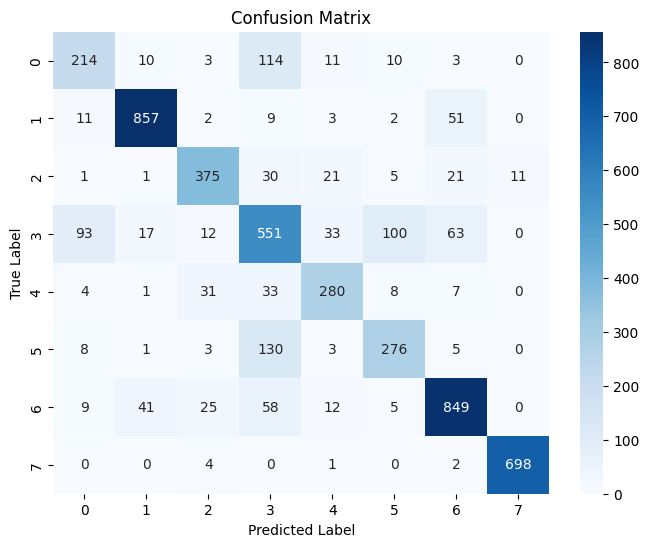

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcoliamo la matrice di confusione
cm = confusion_matrix(y_test_labels, y_pred)

# Creiamo una heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(8), yticklabels=range(8))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# **Convolutional Neural Network Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [ ]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=( 64, 64, 3)),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(256, (3, 3), activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(np.unique(y_encoded)), activation='softmax')
 ])

In [ ]:


early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.compile(
    optimizer=Adam(learning_rate=0.00001),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,048,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │           2,056 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,441,224 (5.50 MB)

 Trainable params: 1,440,264 (5.49 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    class_weight=class_weight_dict,
    batch_size=16,
    callbacks=[early_stop]
)


Epoch 1/50
524/524 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.2085 - loss: 3.3641 - val_accuracy: 0.3563 - val_loss: 1.6513
Epoch 2/50
524/524 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4309 - loss: 1.5233 - val_accuracy: 0.6398 - val_loss: 1.1375
Epoch 3/50
524/524 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5397 - loss: 1.2272 - val_accuracy: 0.7220 - val_loss: 0.9246
Epoch 4/50
524/524 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6227 - loss: 1.0211 - val_accuracy: 0.7666 - val_loss: 0.7724
Epoch 5/50
524/524 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6877 - loss: 0.8711 - val_accuracy: 0.8039 - val_loss: 0.6428
Epoch 6/50
524/524 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7314 - loss: 0.7624 - val_accuracy: 0.8045 - val_loss: 0.6036
Epoch 7/50
524/524 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7608 - loss: 0.6816 - val_accuracy: 0.8237 - val_loss: 0.5516
Epoch 8/50
524/524 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7870 - loss: 0.6092 - val_accuracy: 

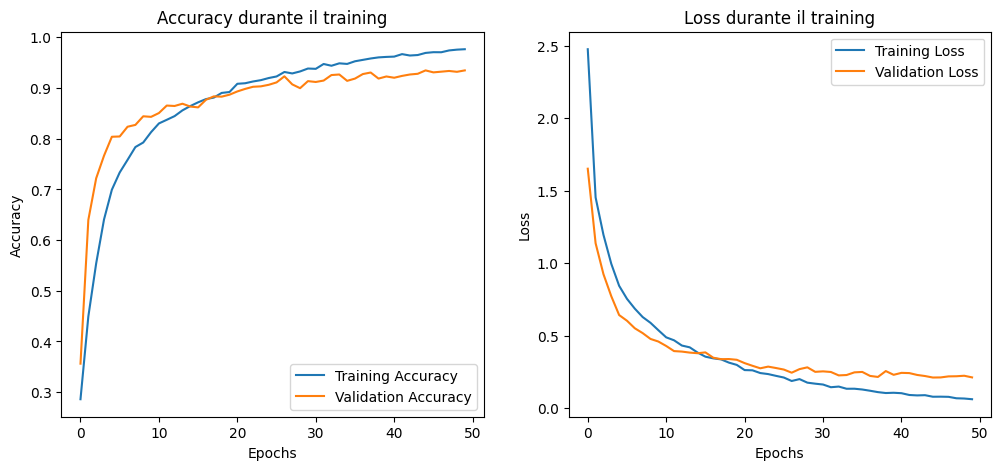

In [ ]:
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Accuracy durante il training")

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss durante il training")

plt.show()

161/161 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


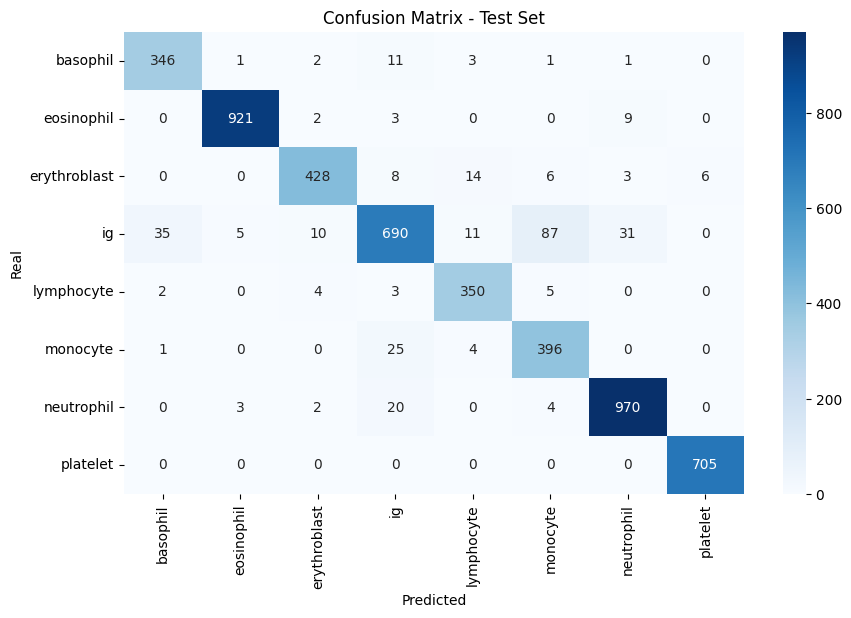

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_test_pred = model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test, axis=1)


conf_matrix = confusion_matrix(y_test_true_classes, y_test_pred_classes)

plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Real")
plt.title("Confusion Matrix - Test Set")
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9402 - loss: 0.1751


In [ ]:
from sklearn.metrics import classification_report

# Predizioni sul test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Report delle metriche
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))


161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
              precision    recall  f1-score   support

    basophil       0.90      0.95      0.92       365
  eosinophil       0.99      0.99      0.99       935
erythroblast       0.96      0.92      0.94       465
          ig       0.91      0.79      0.85       869
  lymphocyte       0.92      0.96      0.94       364
    monocyte       0.79      0.93      0.86       426
  neutrophil       0.96      0.97      0.96       999
    platelet       0.99      1.00      1.00       705

    accuracy                           0.94      5128
   macro avg       0.93      0.94      0.93      5128
weighted avg       0.94      0.94      0.94      5128



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step


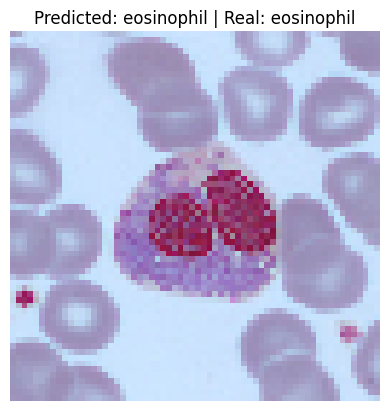

In [ ]:
import random

# Scegliamo un'immagine casuale dal Test Set
random_idx = random.randint(0, len(X_test) - 1)
img = X_test[random_idx]

# Previsione
prediction = model.predict(np.expand_dims(img, axis=0))
predicted_class = label_encoder.classes_[np.argmax(prediction)]

true_class = label_encoder.classes_[np.argmax(y_test[random_idx])]

plt.imshow(img)
plt.title(f"Predicted: {predicted_class} | Real: {true_class}")
plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


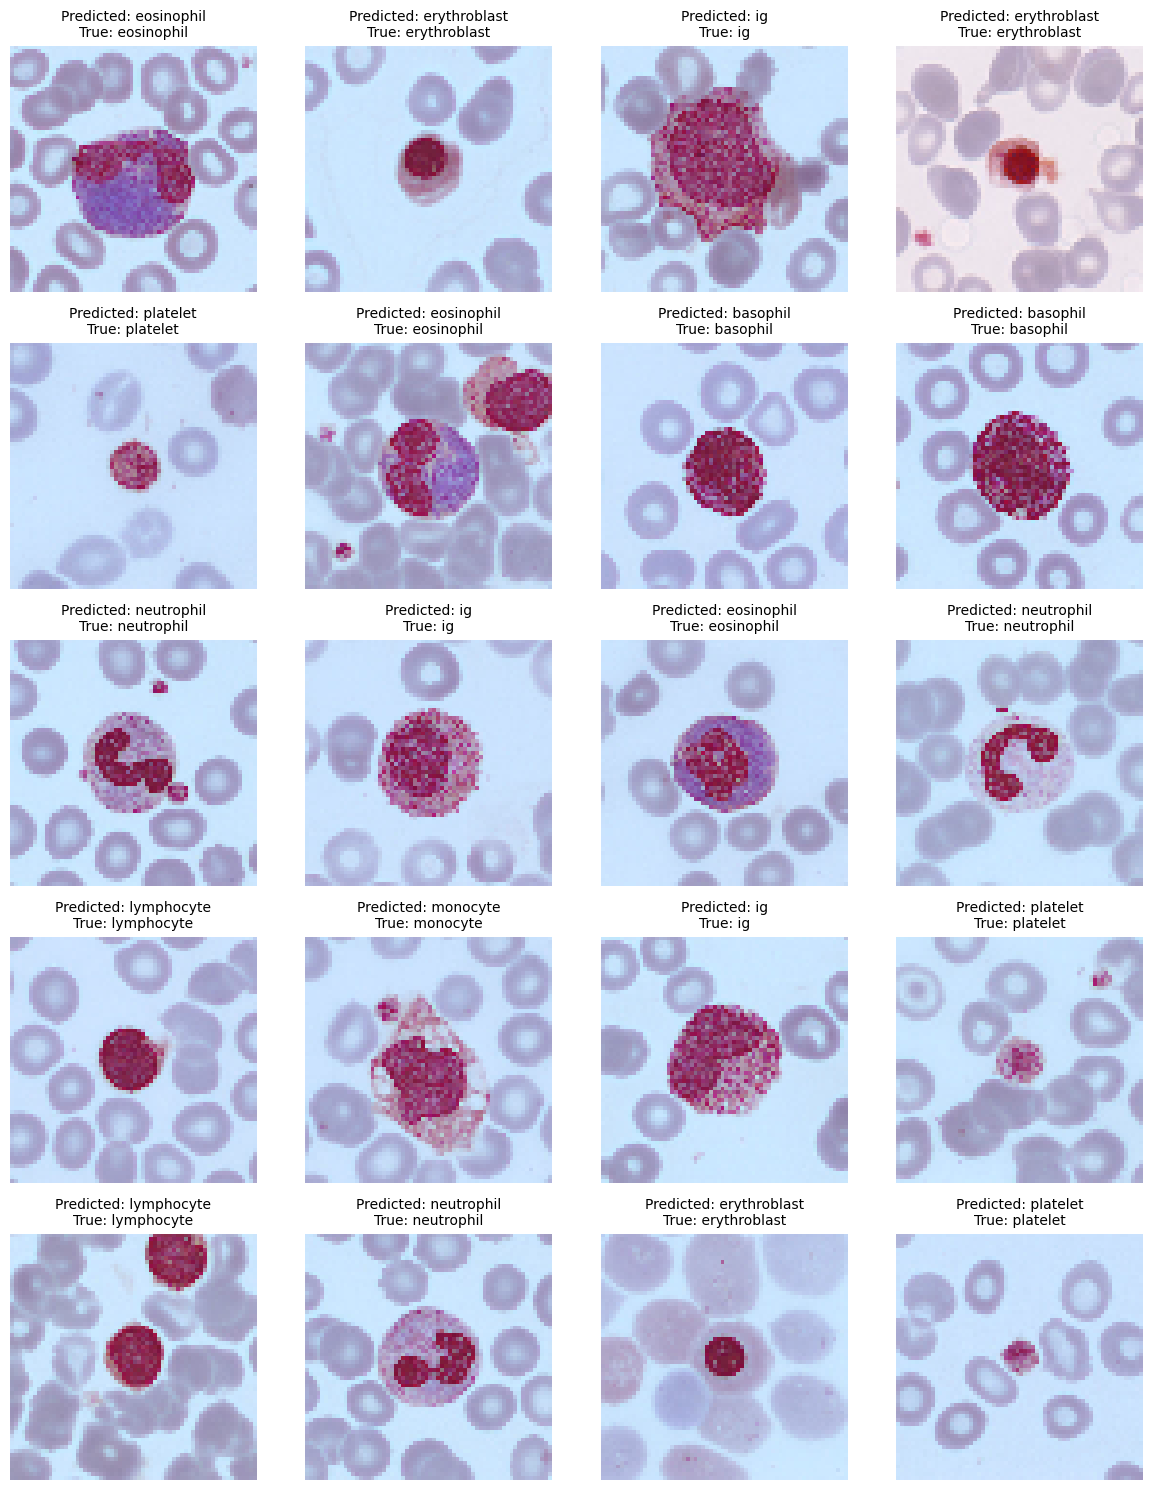

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Numero di immagini da visualizzare
num_images = 20  # Cambia questo numero in base al numero di immagini che vuoi visualizzare
rows = 5  # Numero di righe
cols = num_images // rows  # Numero di colonne, calcolato in base al numero di immagini e righe

# Selezioniamo indici casuali dal test set
random_indices = random.sample(range(len(X_test)), num_images)

# Creiamo la figura con più subplot
fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))

# Flatten se axes è un array 2D (necessario per iterare facilmente)
axes = axes.flatten()

for i, idx in enumerate(random_indices):
    img = X_test[idx]

    # Previsione
    prediction = model.predict(np.expand_dims(img, axis=0))
    predicted_class = label_encoder.classes_[np.argmax(prediction)]

    # Valore reale
    true_class = label_encoder.classes_[np.argmax(y_test[idx])]

    # Visualizzazione
    axes[i].imshow(img)
    axes[i].set_title(f"Predicted: {predicted_class}\nTrue: {true_class}", fontsize=10)
    axes[i].axis("off")

# Rimuoviamo eventuali subplot vuoti
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()
